In [17]:
# ==============================
# 1. Libraries
# ==============================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ==============================
# 2. Synthetic HR Dataset
# ==============================
np.random.seed(42)
n = 2000

df = pd.DataFrame({
    "age": np.random.randint(21, 60, n),
    "experience_years": np.random.randint(0, 20, n),
    "attendance_rate": np.clip(np.random.normal(0.9, 0.07, n), 0.5, 1.0),
    "training_score": np.clip(np.random.normal(70, 10, n), 0, 100),
    "engagement_score": np.clip(np.random.normal(75, 10, n), 0, 100),
    "num_warnings_issued": np.random.choice([0,1,2,3], n, p=[0.7,0.15,0.1,0.05]),
    "department": np.random.choice(
        ["Operations", "HR", "Finance", "Tech", "Support"], n
    )
})

# ==============================
# 3. Performance Label Creation
# ==============================
latent_score = (
    0.3 * df["attendance_rate"] * 100 +
    0.25 * df["training_score"] +
    0.2 * df["engagement_score"] -
    5 * df["num_warnings_issued"]
)

df["performance_label"] = pd.qcut(
    latent_score,
    q=[0, 0.4, 0.75, 1.0],
    labels=["Low", "Average", "High"]
)

# ==============================
# 4. Preprocessing
# ==============================
dept_encoder = LabelEncoder()
df["department"] = dept_encoder.fit_transform(df["department"])

X = df.drop("performance_label", axis=1)
y = df["performance_label"]

# ==============================
# 5. Train-Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==============================
# 6. Model Training (ML Core)
# ==============================
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

# ==============================
# 7. Model Evaluation
# ==============================
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# ==============================
# 8. Sample Case Prediction (FINAL DEMO PART)
# ==============================
sample_employee = pd.DataFrame({
    "age": [34],
    "experience_years": [7],
    "attendance_rate": [0.94],
    "training_score": [78],
    "engagement_score": [82],
    "num_warnings_issued": [0],
    "department": dept_encoder.transform(["Operations"])
})

sample_prediction = rf_model.predict(sample_employee)

print("\nPredicted Performance for Sample Employee:", sample_prediction[0])


Accuracy: 0.92

Classification Report:

              precision    recall  f1-score   support

     Average       0.85      0.94      0.89       141
        High       0.96      0.91      0.93        93
         Low       0.97      0.91      0.94       166

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400


Confusion Matrix:

[[132   4   5]
 [  8  85   0]
 [ 15   0 151]]

Predicted Performance for Sample Employee: High


/tmp/ipython-input-3036699843.py:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureW

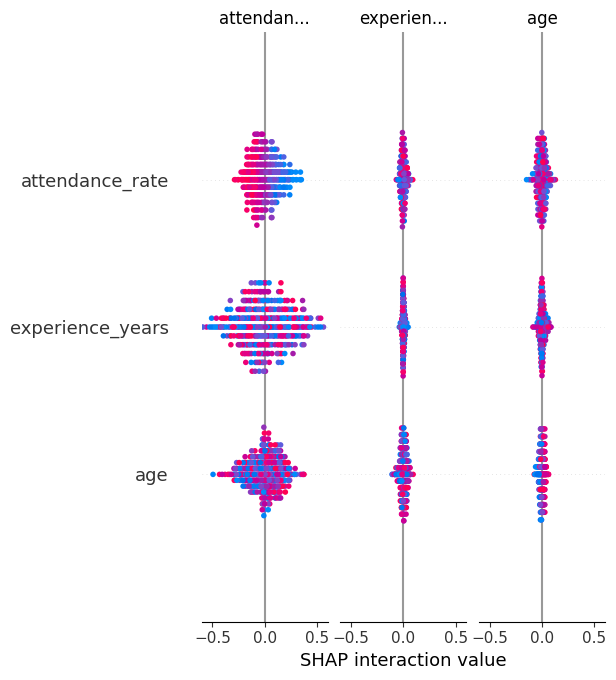

In [18]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Global feature importance plot
shap.summary_plot(shap_values, X_test)

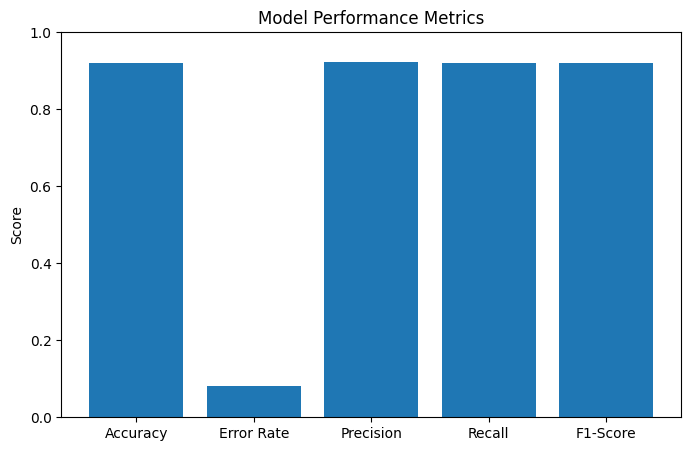

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(metrics_df["Metric"], metrics_df["Value"])
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()
